In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import highlight_text
from mplsoccer.pitch import Pitch, VerticalPitch

In [195]:
pd.set_option('display.max_columns', None)

In [197]:
df = pd.read_csv('Goa vs East Bengal.csv')

In [199]:
df

,id,eventId,typeId,periodId,timeMin,timeSec,contestantId,outcome,x,y,timeStamp,lastModified,qualifier/0/id,qualifier/0/qualifierId,qualifier/0/value,qualifier/1/id,qualifier/1/qualifierId,qualifier/1/value,qualifier/2/id,qualifier/2/qualifierId,qualifier/2/value,qualifier/3/id,qualifier/3/qualifierId,qualifier/3/value,qualifier/4/id,qualifier/4/qualifierId,qualifier/4/value,qualifier/5/id,qualifier/5/qualifierId,qualifier/5/value,qualifier/6/id,qualifier/6/qualifierId,qualifier/6/value,qualifier/7/id,qualifier/7/qualifierId,qualifier/7/value,playerId,playerName,keyPass,qualifier/8/id,qualifier/8/qualifierId,qualifier/8/value,qualifier/9/id,qualifier/9/qualifierId,qualifier/10/id,qualifier/10/qualifierId,qualifier/11/id,qualifier/11/qualifierId,qualifier/11/value,qualifier/9/value,qualifier/12/id,qualifier/12/qualifierId,qualifier/12/value,qualifier/13/id,qualifier/13/qualifierId,qualifier/13/value,qualifier/14/id,qualifier/14/qualifierId,qualifier/14/value,qualifier/10/value,assist,qualifier/15/id,qualifier/15/qualifierId,qualifier/15/value,qualifier/16/id,qualifier/16/qualifierId,qualifier/17/id,qualifier/17/qualifierId,qualifier/17/value,qualifier/18/id,qualifier/18/qualifierId,qualifier/19/id,qualifier/19/qualifierId,qualifier/19/value
0,2766906853,1,34,16,0,0,28au628w8n2jhgujuwh3y5d8k,1,0.0,0.0,2025-01-19T13:04:51.928Z,2025-01-19T13:04:52Z,5.464807e+09,30.0,"d18hxamo4wksojpx0f2zjy63u, 2haf9lri7plf00nrxt5...",5.464807e+09,131.0,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0,...",5.464807e+09,130.0,2,5.464807e+09,44.0,"1, 2, 2, 3, 2, 2, 3, 3, 4, 4, 3, 5, 5, 5, 5, 5...",5.464807e+09,197.0,7231,5.464807e+09,59.0,"13, 11, 22, 6, 5, 19, 82, 29, 9, 14, 7, 10, 24...",5.464807e+09,194.0,dgiqagc8iygqc0a1f3gj03q0a,5.464807e+09,227.0,"0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2766908077,1,34,16,0,0,9eqjks8amwm1ycytsoi7xld25,1,0.0,0.0,2025-01-19T13:06:16.956Z,2025-01-19T13:06:17Z,5.464813e+09,44.0,"1, 2, 2, 3, 2, 2, 3, 3, 4, 3, 3, 5, 5, 5, 5, 5...",5.464813e+09,30.0,"ekizuw6hg7uyaojwjusby1jbo, dl5tnk2o8rwiacgbsnl...",5.464813e+09,131.0,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0,...",5.464813e+09,227.0,"0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",5.464813e+09,194.0,cs6a7dp9ot01jwplqj2xmxrrp,5.464813e+09,130.0,8,5.464813e+09,197.0,18537,5.464813e+09,59.0,"55, 17, 27, 26, 16, 3, 10, 15, 9, 34, 42, 14, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2766944611,3,32,1,0,0,9eqjks8amwm1ycytsoi7xld25,1,0.0,0.0,2025-01-19T14:00:31.342Z,2025-01-19T14:00:31Z,5.465004e+09,127.0,Right to Left,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2766944621,3,32,1,0,0,28au628w8n2jhgujuwh3y5d8k,1,0.0,0.0,2025-01-19T14:00:31.342Z,2025-01-19T14:00:33Z,5.465004e+09,127.0,Left to Right,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2766944747,4,1,1,0,0,9eqjks8amwm1ycytsoi7xld25,1,50.1,50.0,2025-01-19T14:00:31.343Z,2025-01-19T14:00:42Z,5.465005e+09,212.0,32.5,5.465005e+09,213.0,3.17,5.465005e+09,56.0,Back,5.465005e+09,140.0,19.2,5.465005e+09,141.0,48.5,5.465005e+09,1.0,NaN,5.465005e+09,279.0,S,NaN,NaN,NaN,cjlcl3qpjqrsnouucxg7xpuqd,Borja Herrera,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [77]:
player = df[df['playerName'] == 'B. Fernandes']

In [79]:
player

,id,eventId,typeId,periodId,timeMin,timeSec,contestantId,outcome,x,y,...,qualifier/16/id,qualifier/16/qualifierId,qualifier/17/id,qualifier/17/qualifierId,qualifier/17/value,qualifier/18/id,qualifier/18/qualifierId,qualifier/19/id,qualifier/19/qualifierId,qualifier/19/value
37,2766946237,29,61,1,1,45,9eqjks8amwm1ycytsoi7xld25,0,56.8,91.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,2766946293,30,5,1,1,45,9eqjks8amwm1ycytsoi7xld25,0,53.1,101.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,2767053935,753,74,1,2,59,9eqjks8amwm1ycytsoi7xld25,1,37.6,52.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,2766948715,40,4,1,3,50,9eqjks8amwm1ycytsoi7xld25,1,70.6,82.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,2766951245,57,1,1,6,7,9eqjks8amwm1ycytsoi7xld25,1,93.8,91.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,2766952653,68,1,1,7,20,9eqjks8amwm1ycytsoi7xld25,1,63.0,91.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,2766953273,75,7,1,7,51,9eqjks8amwm1ycytsoi7xld25,1,79.8,93.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132,2766953375,76,5,1,7,53,9eqjks8amwm1ycytsoi7xld25,0,83.0,101.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,2766953653,77,7,1,8,17,9eqjks8amwm1ycytsoi7xld25,1,64.6,91.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,2766953659,78,49,1,8,19,9eqjks8amwm1ycytsoi7xld25,1,63.0,84.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
goal = player[player['typeId'] == 16]
recovery = player[player['typeId'] == 49]
tackle = player[player['typeId'] == 7]

foul = player[player['typeId'] == 4]
foul_won = foul[foul['outcome'] == 1]

interception  = player[player['typeId'] == 8]

dribble = player[player['typeId'] == 3]
succ_dribble = dribble[dribble['outcome'] == 1]

In [83]:
passes = player[player['typeId'] == 1]

In [85]:
passes

,id,eventId,typeId,periodId,timeMin,timeSec,contestantId,outcome,x,y,...,qualifier/16/id,qualifier/16/qualifierId,qualifier/17/id,qualifier/17/qualifierId,qualifier/17/value,qualifier/18/id,qualifier/18/qualifierId,qualifier/19/id,qualifier/19/qualifierId,qualifier/19/value
93,2766951245,57,1,1,6,7,9eqjks8amwm1ycytsoi7xld25,1,93.8,91.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,2766952653,68,1,1,7,20,9eqjks8amwm1ycytsoi7xld25,1,63.0,91.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,2766953701,79,1,1,8,20,9eqjks8amwm1ycytsoi7xld25,1,63.0,84.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276,2766964353,163,1,1,17,25,9eqjks8amwm1ycytsoi7xld25,1,45.8,91.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
308,2766966415,185,1,1,19,20,9eqjks8amwm1ycytsoi7xld25,0,34.7,19.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
486,2766978627,304,1,1,33,3,9eqjks8amwm1ycytsoi7xld25,1,80.2,89.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504,2766979973,318,1,1,34,37,9eqjks8amwm1ycytsoi7xld25,0,91.0,69.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
552,2766983331,339,1,1,37,54,9eqjks8amwm1ycytsoi7xld25,1,70.5,72.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
676,2766991607,393,1,1,46,9,9eqjks8amwm1ycytsoi7xld25,0,93.7,71.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
844,2767006431,458,1,2,51,53,9eqjks8amwm1ycytsoi7xld25,1,28.1,50.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
key_pass = passes[passes['keyPass'] == 1]

In [89]:
key_pass

,id,eventId,typeId,periodId,timeMin,timeSec,contestantId,outcome,x,y,...,qualifier/16/id,qualifier/16/qualifierId,qualifier/17/id,qualifier/17/qualifierId,qualifier/17/value,qualifier/18/id,qualifier/18/qualifierId,qualifier/19/id,qualifier/19/qualifierId,qualifier/19/value
552,2766983331,339,1,1,37,54,9eqjks8amwm1ycytsoi7xld25,1,70.5,72.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1161,2767022821,590,1,2,74,12,9eqjks8amwm1ycytsoi7xld25,1,89.8,74.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1297,2767031825,654,1,2,84,45,9eqjks8amwm1ycytsoi7xld25,1,93.9,77.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
key_passes = pd.read_csv('Brison Key Passes.csv')

In [93]:
key_passes

,Player,x,y,end_x,end_y
0,B. Fernandes,70.5,72.7,63.6,52.5
1,B. Fernandes,89.8,74.8,92.7,51.9
2,B. Fernandes,93.9,77.8,89.8,51.2


In [95]:
passes['x'] = passes['x']*1.2
passes['y'] = passes['y']*0.8

recovery['x'] = recovery['x']*1.2
recovery['y'] = recovery['y']*0.8

tackle['x'] = tackle['x']*1.2
tackle['y'] = tackle['y']*0.8

goal['x'] = goal['x']*1.2
goal['y'] = goal['y']*0.8

foul_won['x'] = foul_won['x']*1.2
foul_won['y'] = foul_won['y']*0.8

interception['x'] = interception['x']*1.2
interception['y'] = interception['y']*0.8

succ_dribble['x'] = succ_dribble['x']*1.2
succ_dribble['y'] = succ_dribble['y']*0.8

key_passes['x'] = key_passes['x']*1.2
key_passes['end_x'] = key_passes['end_x']*1.2

key_passes['y'] = key_passes['y']*0.8
key_passes['end_y'] = key_passes['end_y']*0.8

C:\Users\risha\AppData\Local\Temp\ipykernel_14600\458824819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passes['x'] = passes['x']*1.2
C:\Users\risha\AppData\Local\Temp\ipykernel_14600\458824819.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passes['y'] = passes['y']*0.8
C:\Users\risha\AppData\Local\Temp\ipykernel_14600\458824819.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

C:\Users\risha\anaconda3\lib\site-packages\mplsoccer\_pitch_plot.py:167: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)


Text(0.8, 0.13, '- Rishav Dey')

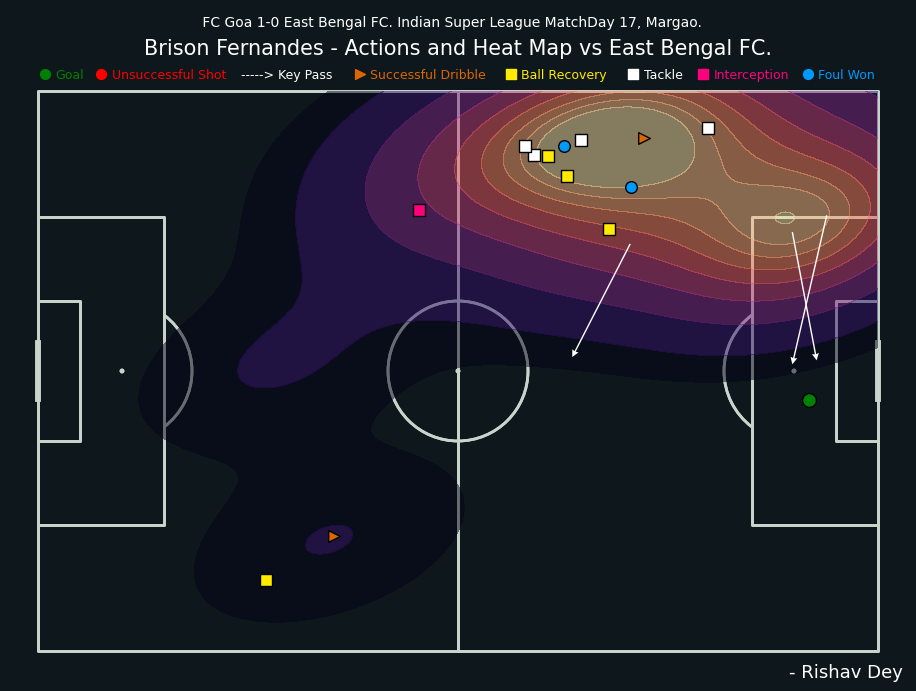

In [201]:
pitch = Pitch(pitch_type='statsbomb',
                      pitch_color='#0e171c', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(13.5,8), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#0e171c')

pitch.draw(ax=ax)
plt.gca().invert_yaxis()

kde = pitch.kdeplot(
                  passes.x, passes.y,ax = ax,
                  shade = True,
                  shade_lowest = False,
                  alpha = .5,
                  n_levels = 10,
                  cmap = 'magma')

plt.scatter(goal['x'], goal['y'], s= 100, c = 'g', edgecolor = '#000000')
plt.scatter(recovery['x'], recovery['y'], s= 70, c = '#ffea00', marker = 's', edgecolor = '#000000')
plt.scatter(succ_dribble['x'], succ_dribble['y'], s= 70, c = '#dc6601', marker = '>', edgecolor = '#000000')
plt.scatter(tackle['x'], tackle['y'], s= 70,c = 'w', marker = ',', edgecolor = '#000000')
plt.scatter(foul_won['x'], foul_won['y'], s= 70, c = '#009afd', edgecolor = '#000000')
plt.scatter(interception['x'], interception['y'], s = 70, c = '#ff007f', marker = ',', edgecolor = '#000000')

pitch.arrows(key_passes.x, key_passes.y, key_passes.end_x, key_passes.end_y, width=1,
             headwidth=5, headlength=5, color='white', ax=ax, label='Key Passes')

plt.title("Brison Fernandes - Actions and Heat Map vs East Bengal FC.", c='w', fontsize=15)

highlight_text.fig_text(x = 0.32, y = 0.94,
                        s = ' FC Goa 1-0 East Bengal FC. Indian Super League MatchDay 17, Margao.',
                        fontsize = 10,
                        color = 'white'
                       )

plt.scatter(x = 1, y = 82.5, s = 50, c = 'g')
plt.text(x = 2.5, y = 81.8, s = f'Goal', c = 'g', fontsize = 9)

plt.scatter(x = 9, y = 82.5, s = 50, c = 'r')
plt.text(x = 10.5, y = 81.8, s = f'Unsuccessful Shot', c = 'r', fontsize = 9)

plt.text(x = 29, y = 81.8, s = f'-----> Key Pass', c = 'white', fontsize = 9)

plt.scatter(x = 46, y = 82.5, s = 50, c = '#dc6601', marker = '>')
plt.text(x = 47.5, y = 81.8, s = f'Successful Dribble', c = '#dc6601', fontsize = 9)

plt.scatter(x = 67.5, y = 82.5, s = 50, c = '#ffea00', marker = ',')
plt.text(x = 69, y = 81.8, s = f'Ball Recovery', c = '#ffea00', fontsize = 9)

plt.scatter(x = 85, y = 82.5, s = 50, c = 'w', marker = ',')
plt.text(x = 86.5, y = 81.8, s = f'Tackle', c = 'w', fontsize = 9)

plt.scatter(x = 95, y = 82.5, s = 50, c = '#ff007f', marker = ',')
plt.text(x = 96.5, y = 81.8, s = f'Interception', c = '#ff007f', fontsize = 9)

plt.scatter(x = 110, y = 82.5, s = 50, c = '#009afd')
plt.text(x = 111.5, y = 81.8, s = f'Foul Won', c = '#009afd', fontsize = 9)

endnote = "- Rishav Dey"
plt.figtext(0.8, 0.13, endnote, ha="center", va="top", fontsize=13, color="white")